In [1]:

!pip install geojson

import geojson
print(geojson.__version__)  # 输出安装的 geojson 版本

# 读取 GeoJSON 文件
with open(r"/home/jovyan/work/Documents/CASA/QM/groupwork/export.geojson", "r") as f:
    geo_data = geojson.load(f)

# 查看 GeoJSON 的基本结构
print(type(geo_data))  # 输出：<class 'geojson.feature.FeatureCollection'>
print(geo_data.keys())  # 输出 GeoJSON 顶层键（如 'type', 'features'）






3.1.0
<class 'geojson.feature.FeatureCollection'>
dict_keys(['type', 'generator', 'copyright', 'timestamp', 'features'])


In [2]:
#导入犯罪数据
import pandas as pd
crimedata = pd.read_csv("/home/jovyan/work/Documents/CASA/QM/groupwork/MPS LSOA Level Crime (most recent 24 months).csv")
print(crimedata.head())

   LSOA Code                  LSOA Name    Borough  \
0  E01000006  Barking and Dagenham 016A  E09000002   
1  E01000006  Barking and Dagenham 016A  E09000002   
2  E01000006  Barking and Dagenham 016A  E09000002   
3  E01000006  Barking and Dagenham 016A  E09000002   
4  E01000006  Barking and Dagenham 016A  E09000002   

                         Major Category       Minor Category  202112  202201  \
0             Arson and Criminal Damage      Criminal Damage       1       2   
1                              Burglary    Domestic Burglary       1       0   
2                         Drug Offences     Drug Trafficking       0       0   
3                         Drug Offences  Possession of Drugs       2       5   
4  Miscellaneous Crimes Against Society    Dangerous Driving       0       0   

   202202  202203  202204  ...  202302  202303  202304  202305  202306  \
0       1       0       0  ...       0       1       1       0       0   
1       0       1       0  ...       0       0

In [3]:
#导入geodata数据
import geopandas as gpd

# 加载 GeoJSON 文件
geo_data = gpd.read_file("/home/jovyan/work/Documents/CASA/QM/groupwork/export.geojson")
print(geo_data.head())




              id            @id addr:city addr:country addr:housename  \
0    node/780856    node/780856      None         None           None   
1   node/1256794   node/1256794      None         None           None   
2   node/2013971   node/2013971      None         None           None   
3   node/9780241   node/9780241      None         None           None   
4  node/13884199  node/13884199      None         None           None   

  addr:postcode addr:street addr:suburb air_conditioning airside  ...  \
0          None        None        None             None    None  ...   
1          None        None        None             None    None  ...   
2          None        None        None             None    None  ...   
3          None        None        None             None    None  ...   
4          None        None        None             None    None  ...   

  website:departures website:overground website:tube wheelchair  \
0               None               None         None   

In [4]:
# 只保留关键列
columns_to_keep = ["id", "geometry"]
geodata_cleaned = geo_data[columns_to_keep]

print(geodata_cleaned.info())  # 查看清理后的列信息

# 检查是否有重复项
print("Duplicates:", geodata_cleaned.duplicated().sum())

# 查看列名和样本数据
print(geodata_cleaned.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        600 non-null    object  
 1   geometry  600 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 9.5+ KB
None
Duplicates: 0
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        600 non-null    object  
 1   geometry  600 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 9.5+ KB
None


In [5]:
# 直接使用现有的Point对象 
import geopandas as gpd

# 确保 geometry 列是 shapely 对象
geo_gdf = gpd.GeoDataFrame(geodata_cleaned, geometry="geometry")

# 检查坐标系 (CRS)，如果需要，可以设置 CRS
geo_gdf.set_crs(epsg=4326, inplace=True)  # 示例：设置为 WGS84 坐标系


,id,geometry
0,node/780856,POINT (-0.22631 51.50607)
1,node/1256794,POINT (-0.47183 51.50974)
2,node/2013971,POINT (-0.19232 51.60084)
3,node/9780241,POINT (0.10572 51.39474)
4,node/13884199,POINT (-0.2488 51.61267)
...,...,...
595,node/10657930632,POINT (-0.24321 51.53209)
596,node/10657930633,POINT (-0.24437 51.53239)
597,node/12207364957,POINT (-0.10455 51.51975)
598,node/12251132731,POINT (-0.40669 51.42572)


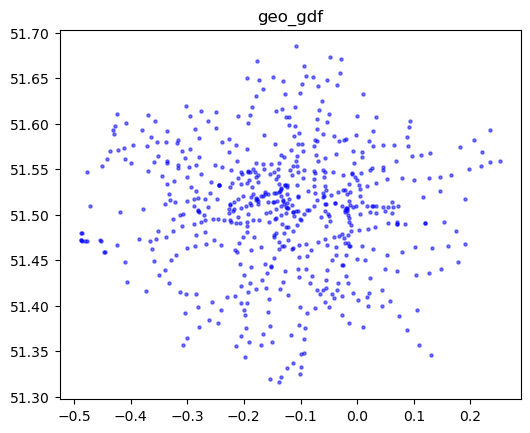

In [6]:
import matplotlib.pyplot as plt

# 绘制站点位置
geo_gdf.plot(markersize=5, color="blue", alpha=0.5)
plt.title("geo_gdf")
plt.show()


In [7]:
# London Borough
# SHP文件
# 加载 SHP 文件
borough_data = gpd.read_file("/home/jovyan/work/Documents/CASA/QM/groupwork/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp")

print(borough_data.head())
print(borough_data.crs)  # 检查坐标参考系统 (CRS)

# 转成WGS84
boroughlon = borough_data.to_crs(epsg=4326)

# 差看转换后的坐标系
print (boroughlon.crs)

# 转换为 GeoJSON 格式
boroughlon.to_file("output_file.geojson", driver="GeoJSON")


                   NAME   GSS_CODE   HECTARES  NONLD_AREA ONS_INNER SUB_2009  \
0  Kingston upon Thames  E09000021   3726.117       0.000         F     None   
1               Croydon  E09000008   8649.441       0.000         F     None   
2               Bromley  E09000006  15013.487       0.000         F     None   
3              Hounslow  E09000018   5658.541      60.755         F     None   
4                Ealing  E09000009   5554.428       0.000         F     None   

  SUB_2006                                           geometry  
0     None  POLYGON ((516401.6 160201.8, 516407.3 160210.5...  
1     None  POLYGON ((535009.2 159504.7, 535005.5 159502, ...  
2     None  POLYGON ((540373.6 157530.4, 540361.2 157551.9...  
3     None  POLYGON ((521975.8 178100, 521967.7 178096.8, ...  
4     None  POLYGON ((510253.5 182881.6, 510249.9 182886, ...  
PROJCS["OSGB36 / British National Grid",GEOGCS["OSGB36",DATUM["Ordnance_Survey_of_Great_Britain_1936",SPHEROID["Airy 1830",6377563.396,

In [8]:
# 空间匹配分配点到LSOA

# 使用空间连接，将站点匹配到对应的 LSOA
stations_with_borough = gpd.sjoin(geo_gdf, boroughlon, how="left", predicate="within")

# 确认匹配结果
print(stations_with_borough.head())


              id                   geometry  index_right  \
0    node/780856  POINT (-0.22631 51.50607)           22   
1   node/1256794  POINT (-0.47183 51.50974)            6   
2   node/2013971  POINT (-0.19232 51.60084)            9   
3   node/9780241   POINT (0.10572 51.39474)            2   
4  node/13884199   POINT (-0.2488 51.61267)            9   

                     NAME   GSS_CODE   HECTARES  NONLD_AREA ONS_INNER  \
0  Hammersmith and Fulham  E09000013   1715.409      75.648         T   
1              Hillingdon  E09000017  11570.063       0.000         F   
2                  Barnet  E09000003   8674.837       0.000         F   
3                 Bromley  E09000006  15013.487       0.000         F   
4                  Barnet  E09000003   8674.837       0.000         F   

  SUB_2009 SUB_2006  
0     None     None  
1     None     None  
2     None     None  
3     None     None  
4     None     None  


In [9]:
# 合并站点数据与犯罪率数据
stations_with_crime = stations_with_borough.merge(crimedata, how="left", left_on="GSS_CODE", right_on="Borough")


# 查看结果
print(stations_with_crime.head())


            id                   geometry  index_right  \
0  node/780856  POINT (-0.22631 51.50607)           22   
1  node/780856  POINT (-0.22631 51.50607)           22   
2  node/780856  POINT (-0.22631 51.50607)           22   
3  node/780856  POINT (-0.22631 51.50607)           22   
4  node/780856  POINT (-0.22631 51.50607)           22   

                     NAME   GSS_CODE  HECTARES  NONLD_AREA ONS_INNER SUB_2009  \
0  Hammersmith and Fulham  E09000013  1715.409      75.648         T     None   
1  Hammersmith and Fulham  E09000013  1715.409      75.648         T     None   
2  Hammersmith and Fulham  E09000013  1715.409      75.648         T     None   
3  Hammersmith and Fulham  E09000013  1715.409      75.648         T     None   
4  Hammersmith and Fulham  E09000013  1715.409      75.648         T     None   

  SUB_2006  ... 202302 202303 202304 202305 202306  202307  202308  202309  \
0     None  ...      0      0      0      0      0       0       1       0   
1     No

In [10]:
# 合并犯罪率到 borough 边界
boroughcrime = boroughlon.merge(crimedata, how="left", left_on="GSS_CODE", right_on="Borough")
boroughcrime["202201"] = boroughcrime["202201"].fillna(0)
print (boroughcrime["202201"].head(30))

import matplotlib.pyplot as plt



0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    1.0
13    0.0
14    0.0
15    0.0
16    0.0
17    2.0
18    0.0
19    1.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    1.0
28    1.0
29    0.0
Name: 202201, dtype: float64


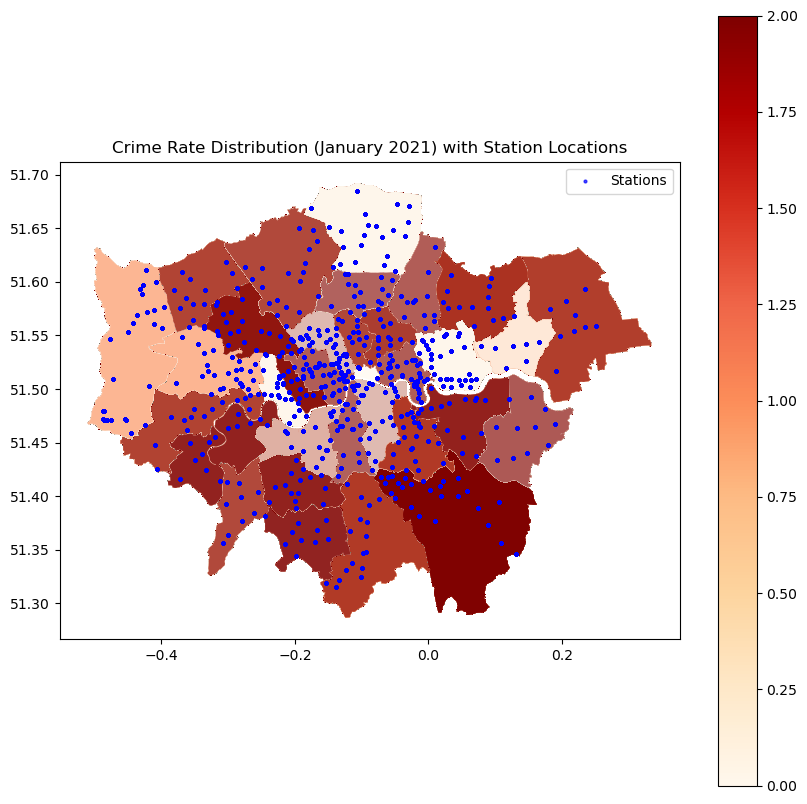

In [11]:
# 绘制 Borough 边界热力图
vmax_value = boroughcrime["202201"].quantile(0.9)  # 90% 分位数
ax = boroughcrime.plot(
    column="202201",  # 指定某个月份
    cmap="OrRd", 
    legend=True, 
    alpha=0.6, 
    figsize=(10, 10),
    vmin=0,  # 设置最小值
    vmax=vmax_value,  # 设置最大值
)

# 绘制站点位置
stations_with_crime.plot(
    ax=ax, 
    color="blue", 
    markersize=4, 
    alpha=0.7, 
    label="Stations"
)

# 添加标题和图例
plt.title("Crime Rate Distribution (January 2021) with Station Locations")
plt.legend()
plt.show()


In [13]:
print(boroughcrime)

                        NAME   GSS_CODE  HECTARES  NONLD_AREA ONS_INNER  \
0       Kingston upon Thames  E09000021  3726.117       0.000         F   
1       Kingston upon Thames  E09000021  3726.117       0.000         F   
2       Kingston upon Thames  E09000021  3726.117       0.000         F   
3       Kingston upon Thames  E09000021  3726.117       0.000         F   
4       Kingston upon Thames  E09000021  3726.117       0.000         F   
...                      ...        ...       ...         ...       ...   
105495  Barking and Dagenham  E09000002  3779.934     169.150         F   
105496  Barking and Dagenham  E09000002  3779.934     169.150         F   
105497  Barking and Dagenham  E09000002  3779.934     169.150         F   
105498  Barking and Dagenham  E09000002  3779.934     169.150         F   
105499        City of London  E09000001   314.942      24.546         T   

       SUB_2009 SUB_2006                                           geometry  \
0          None     

    GSS_CODE  crime_rate  station_count
0  E09000002      1515.0          18067
1  E09000003      2228.0          83277
2  E09000004      1234.0          30426
3  E09000005      2220.0         111020
4  E09000006      1901.0          99216
Correlation: 0.70, P-value: 0.0000


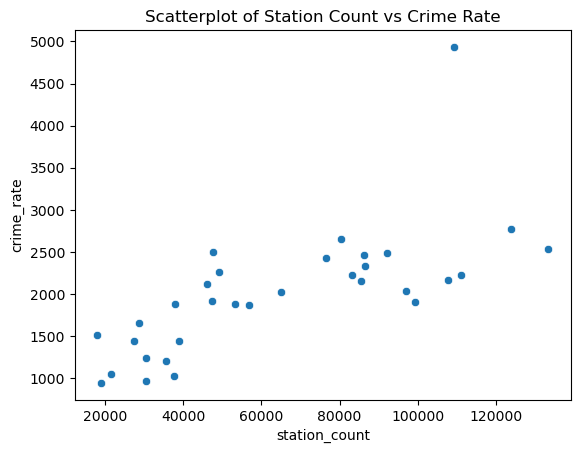

                            OLS Regression Results                            
Dep. Variable:             crime_rate   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     28.55
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           8.84e-06
Time:                        01:24:49   Log-Likelihood:                -246.09
No. Observations:                  32   AIC:                             496.2
Df Residuals:                      30   BIC:                             499.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           996.2262    212.210      4.695

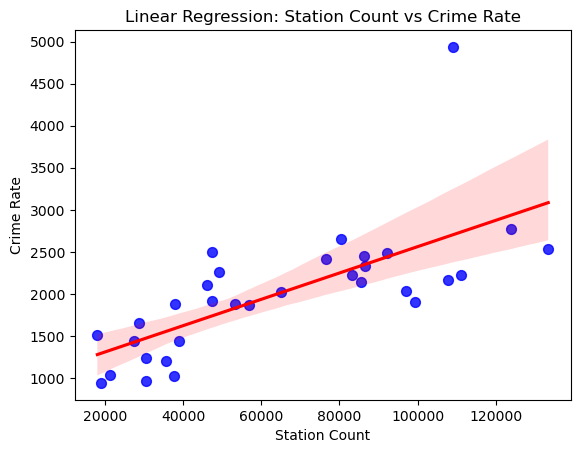

In [21]:
# 按borough汇总犯罪率
boroughcrimerate = boroughcrime.groupby('GSS_CODE')[["202201"]].sum().reset_index()
# 实验版，改个名字
boroughcrimerate.rename(columns={"202201": "crime_rate"}, inplace=True)

# 按borough统计station
boroughstationcount = stations_with_crime.groupby("GSS_CODE").size().reset_index(name="station_count")

# 合并数据
borough_analysis = boroughcrimerate.merge(boroughstationcount, on="GSS_CODE", how="inner")

print(borough_analysis.head())

import scipy.stats as stats

# 计算相关性
correlation, p_value = stats.pearsonr(borough_analysis["crime_rate"], borough_analysis["station_count"])
print(f"Correlation: {correlation:.2f}, P-value: {p_value:.4f}")

# 绘制散点图
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=borough_analysis, x="station_count", y="crime_rate")
plt.title("Scatterplot of Station Count vs Crime Rate")
plt.show()

# 线性回归
import statsmodels.api as sm

# 设置自变量和因变量
X = borough_analysis["station_count"]
y = borough_analysis["crime_rate"]

# 添加常数项
X = sm.add_constant(X)

# 拟合线性回归模型
model = sm.OLS(y, X).fit()

# 输出回归结果
print(model.summary())

# 画一个图
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制线性回归图
sns.regplot(
    x="station_count", 
    y="crime_rate", 
    data=borough_analysis, 
    ci=95,  # 显示95%置信区间
    scatter_kws={"s": 50, "color": "blue"},  # 设置散点样式
    line_kws={"color": "red"}  # 设置回归线样式
)

# 设置标题和轴标签
plt.title("Linear Regression: Station Count vs Crime Rate")
plt.xlabel("Station Count")
plt.ylabel("Crime Rate")
plt.show()

